In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mlflow
import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("/root/code/Cars.csv") #read file csv
df.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [3]:
# shape of matrix in cars.csv
df.shape

(8128, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [51]:
df.columns # list columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [5]:
df_copy = df.copy() # Save dataframe

In [6]:
# Drop feature torque because Chaky's company cannot understand this.
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [7]:
# take first name as a new column which name is brand
df_copy["brand"] = df_copy["name"].str.split(" ").str[0]
df_copy.drop(["name"], axis=1, inplace=True)

# Split features of mileage, engine and max power into value and unit
df_copy[["mileage_value","mileage_unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["engine_value","engine_unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["max_power_value","max_power_unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp


In [8]:
df_copy[(df_copy["fuel"] == 'LPG') | (df_copy["fuel"] == 'CNG')] #Check fuel of selling car which are either LPG to CNG

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
6,2007,96000,175000,LPG,Individual,Manual,First Owner,5.0,Maruti,17.3,km/kg,1061,CC,57.5,bhp
35,2019,330000,10000,CNG,Individual,Manual,Second Owner,4.0,Maruti,33.44,km/kg,796,CC,40.3,bhp
90,2010,225000,44000,LPG,Dealer,Manual,First Owner,5.0,Maruti,26.2,km/kg,998,CC,58.2,bhp
203,2016,360000,50000,CNG,Individual,Manual,First Owner,5.0,Maruti,26.6,km/kg,998,CC,58.16,bhp
402,2020,409999,35000,CNG,Individual,Manual,First Owner,5.0,Maruti,20.88,km/kg,1196,CC,61.7,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2010,155000,70000,CNG,Individual,Manual,Second Owner,5.0,Maruti,26.83,km/kg,796,CC,38.4,bhp
7543,2019,330000,10000,CNG,Individual,Manual,Second Owner,4.0,Maruti,33.44,km/kg,796,CC,40.3,bhp
7642,2012,300000,70000,LPG,Individual,Manual,First Owner,5.0,Chevrolet,13.2,km/kg,995,CC,60.2,bhp
7733,2015,380000,20000,CNG,Individual,Manual,First Owner,5.0,Maruti,21.94,km/kg,1196,CC,61.7,bhp


In [9]:
# Since unit of mileage of LPG and CNG differs from other fuel and there is small sample.
# Thus remove fuel feature containg LPG and CNG
df_copy = df_copy.loc[(df_copy["fuel"] != 'LPG') & (df_copy["fuel"] != 'CNG')]
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,brand,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,23.4,kmpl,1248,CC,74,bhp
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,21.14,kmpl,1498,CC,103.52,bhp
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,17.7,kmpl,1497,CC,78,bhp
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,Hyundai,23.0,kmpl,1396,CC,90,bhp
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,Maruti,16.1,kmpl,1298,CC,88.2,bhp
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,20.14,kmpl,1197,CC,81.86,bhp
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,4.0,Maruti,16.1,kmpl,796,CC,37,bhp
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,5.0,Toyota,23.59,kmpl,1364,CC,67.1,bhp
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,5.0,Ford,20.0,kmpl,1399,CC,68.1,bhp
10,2014,500000,68000,Diesel,Individual,Manual,Second Owner,5.0,Renault,19.01,kmpl,1461,CC,108.45,bhp


In [10]:
# convert values of mileage, engine and max_power into float
df_copy[["mileage","engine","max_power"]] = df_copy[["mileage_value","engine_value","max_power_value"]].astype('float64')
df_copy.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# Arrange the columns
df_copy = df_copy.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

df_copy

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [11]:
# Check categories of brand, fuel, seller type and owner
print("categories of brand are", df_copy["brand"].unique())
print("categories of fuel are", df_copy["fuel"].unique())
print("categories of seller_type are", df_copy["seller_type"].unique())
print("categories of owner are", df_copy["owner"].unique())

categories of brand are ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
categories of fuel are ['Diesel' 'Petrol']
categories of seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
categories of owner are ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


#Mapping owner as ordinary number

First Owner as 1

Second Owner as 2

Third Owner as 3

Fourth & Above Owner as 4

Testing Drive Car as 5

In [12]:
# Mapping owner feature into ordinal numbers
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
df_copy["owner"] = df_copy["owner"].map(dict_owner)
df_copy.head(20)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,Petrol,Individual,Manual,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,Diesel,Individual,Manual,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,Diesel,Individual,Manual,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,Diesel,Individual,Manual,2,19.01,1461.0,108.45,5.0


In [13]:
# find shape of matrix of df_copy
df_copy.shape

(8033, 12)

In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [15]:
df_copy.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,19.390375,1463.090677,91.864733,5.421281
std,4.031655,8.098635e+05,5.664361e+04,0.720497,4.001777,504.655439,35.846839,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [82]:
feature_names= df_copy.columns
print(feature_names)

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'log_km_driven'],
      dtype='object')


2. Exploratory data analysis

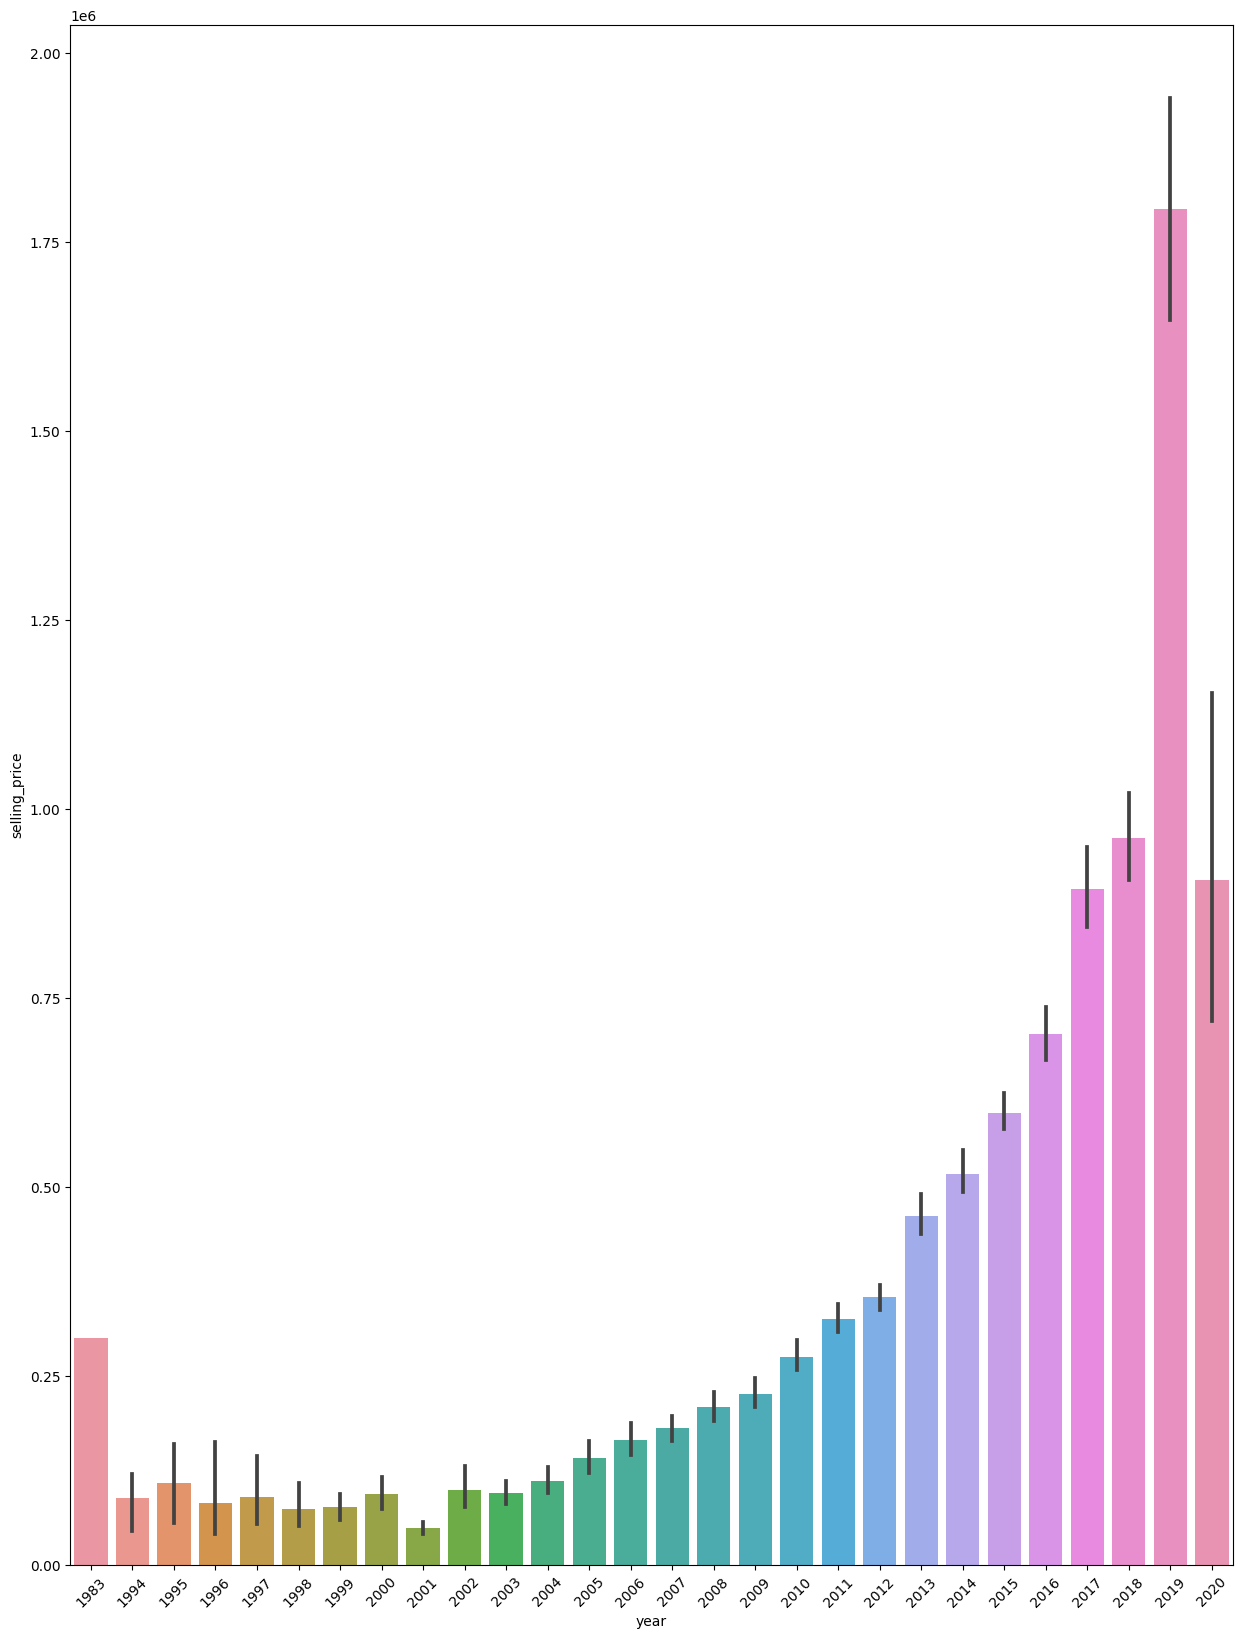

In [17]:
# Create bar chart for selling price in each year

plt.figure(figsize = (15,20))
sns.barplot(data = df_copy, x = "year", y = "selling_price")
plt.xticks(rotation = 45)
plt.show()

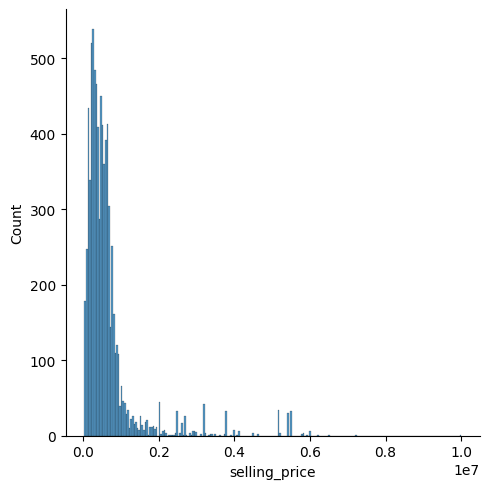

In [18]:
# Create histogram plot for selling price
sns.displot(x = df_copy["selling_price"])

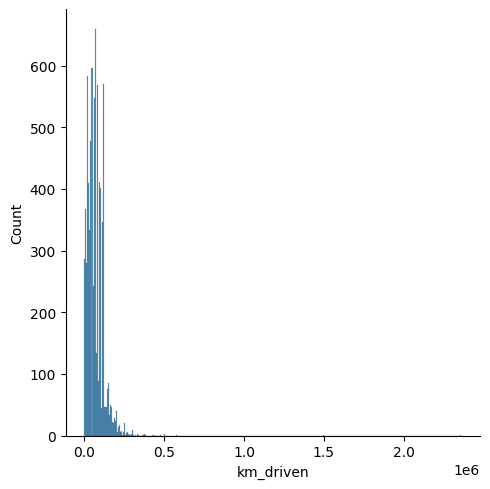

In [19]:
# Create histogram plot for km_driven
sns.displot(x = df_copy["km_driven"])

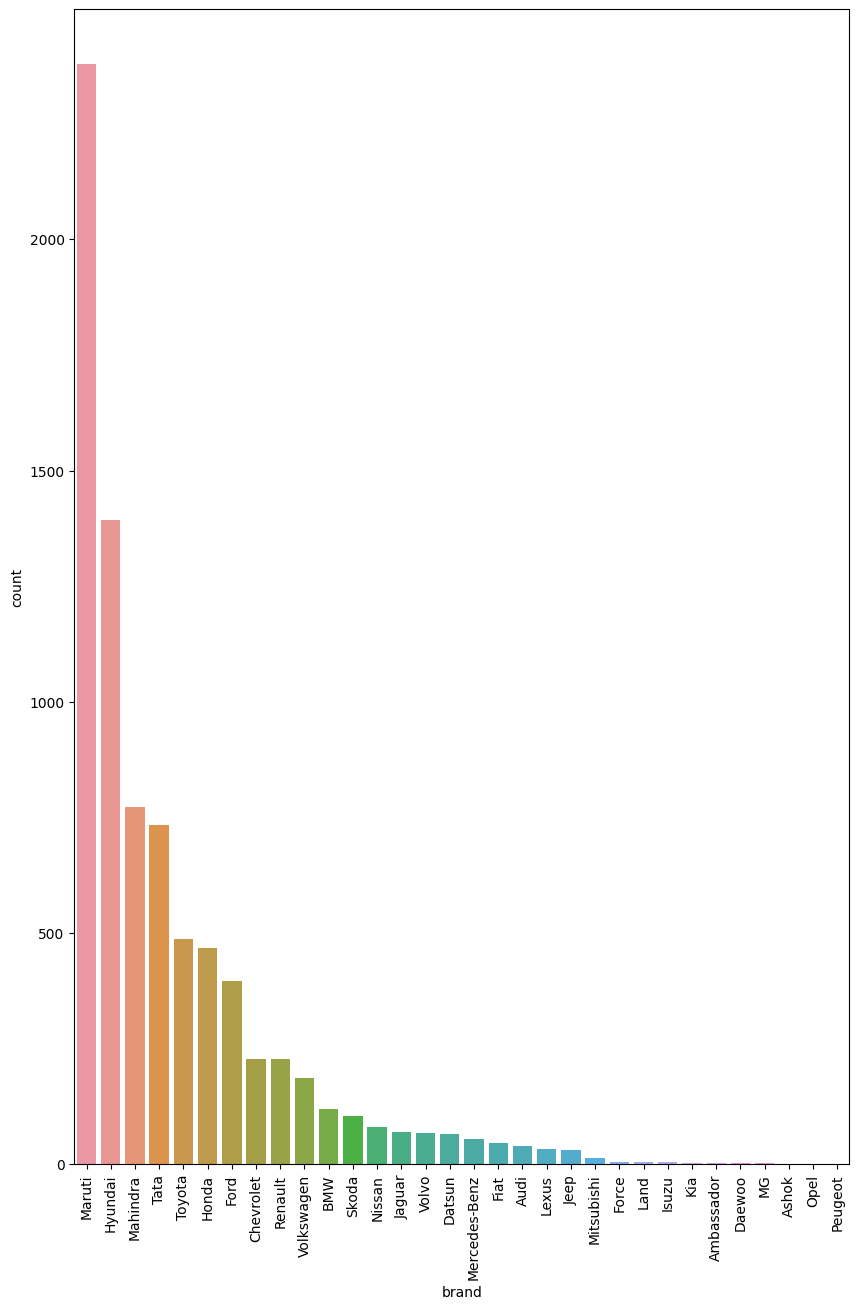

In [20]:
# Create countplot for car brand name

plt.figure(figsize = (10,15))
sns.countplot(data = df_copy, x = 'brand', order = df_copy['brand'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

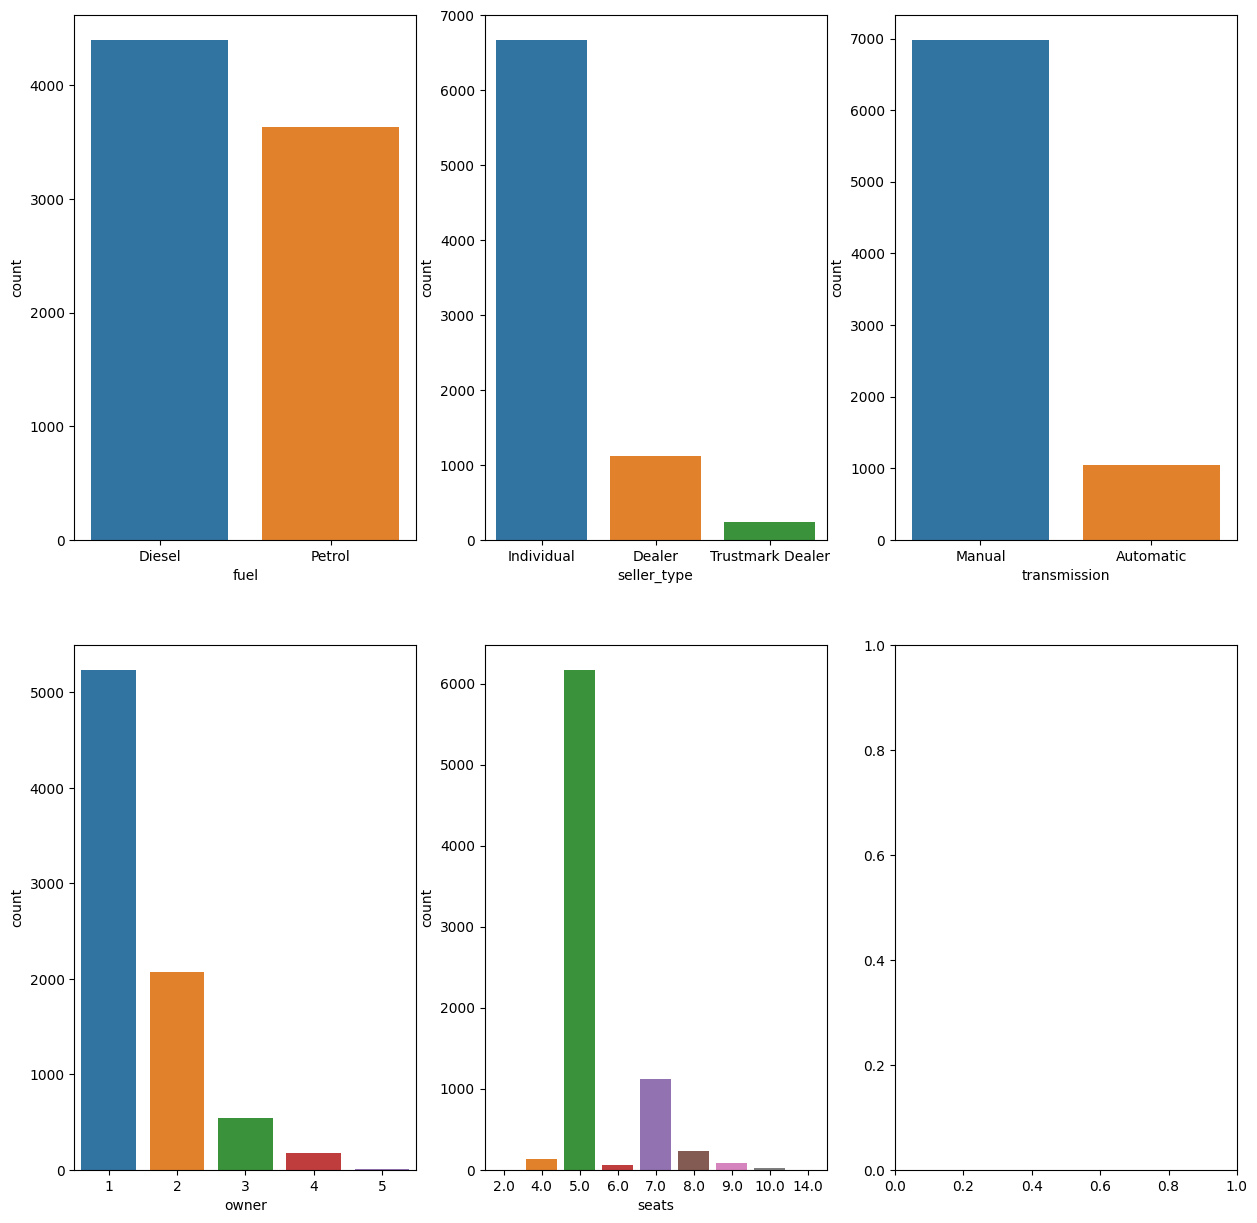

In [21]:
# Create countplot for types of fuel, types of seller, types of transmission, types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (15,15))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner","seats"]):
    graph = sns.countplot(data = df_copy, x = col, ax = ax[i//3,i%3])


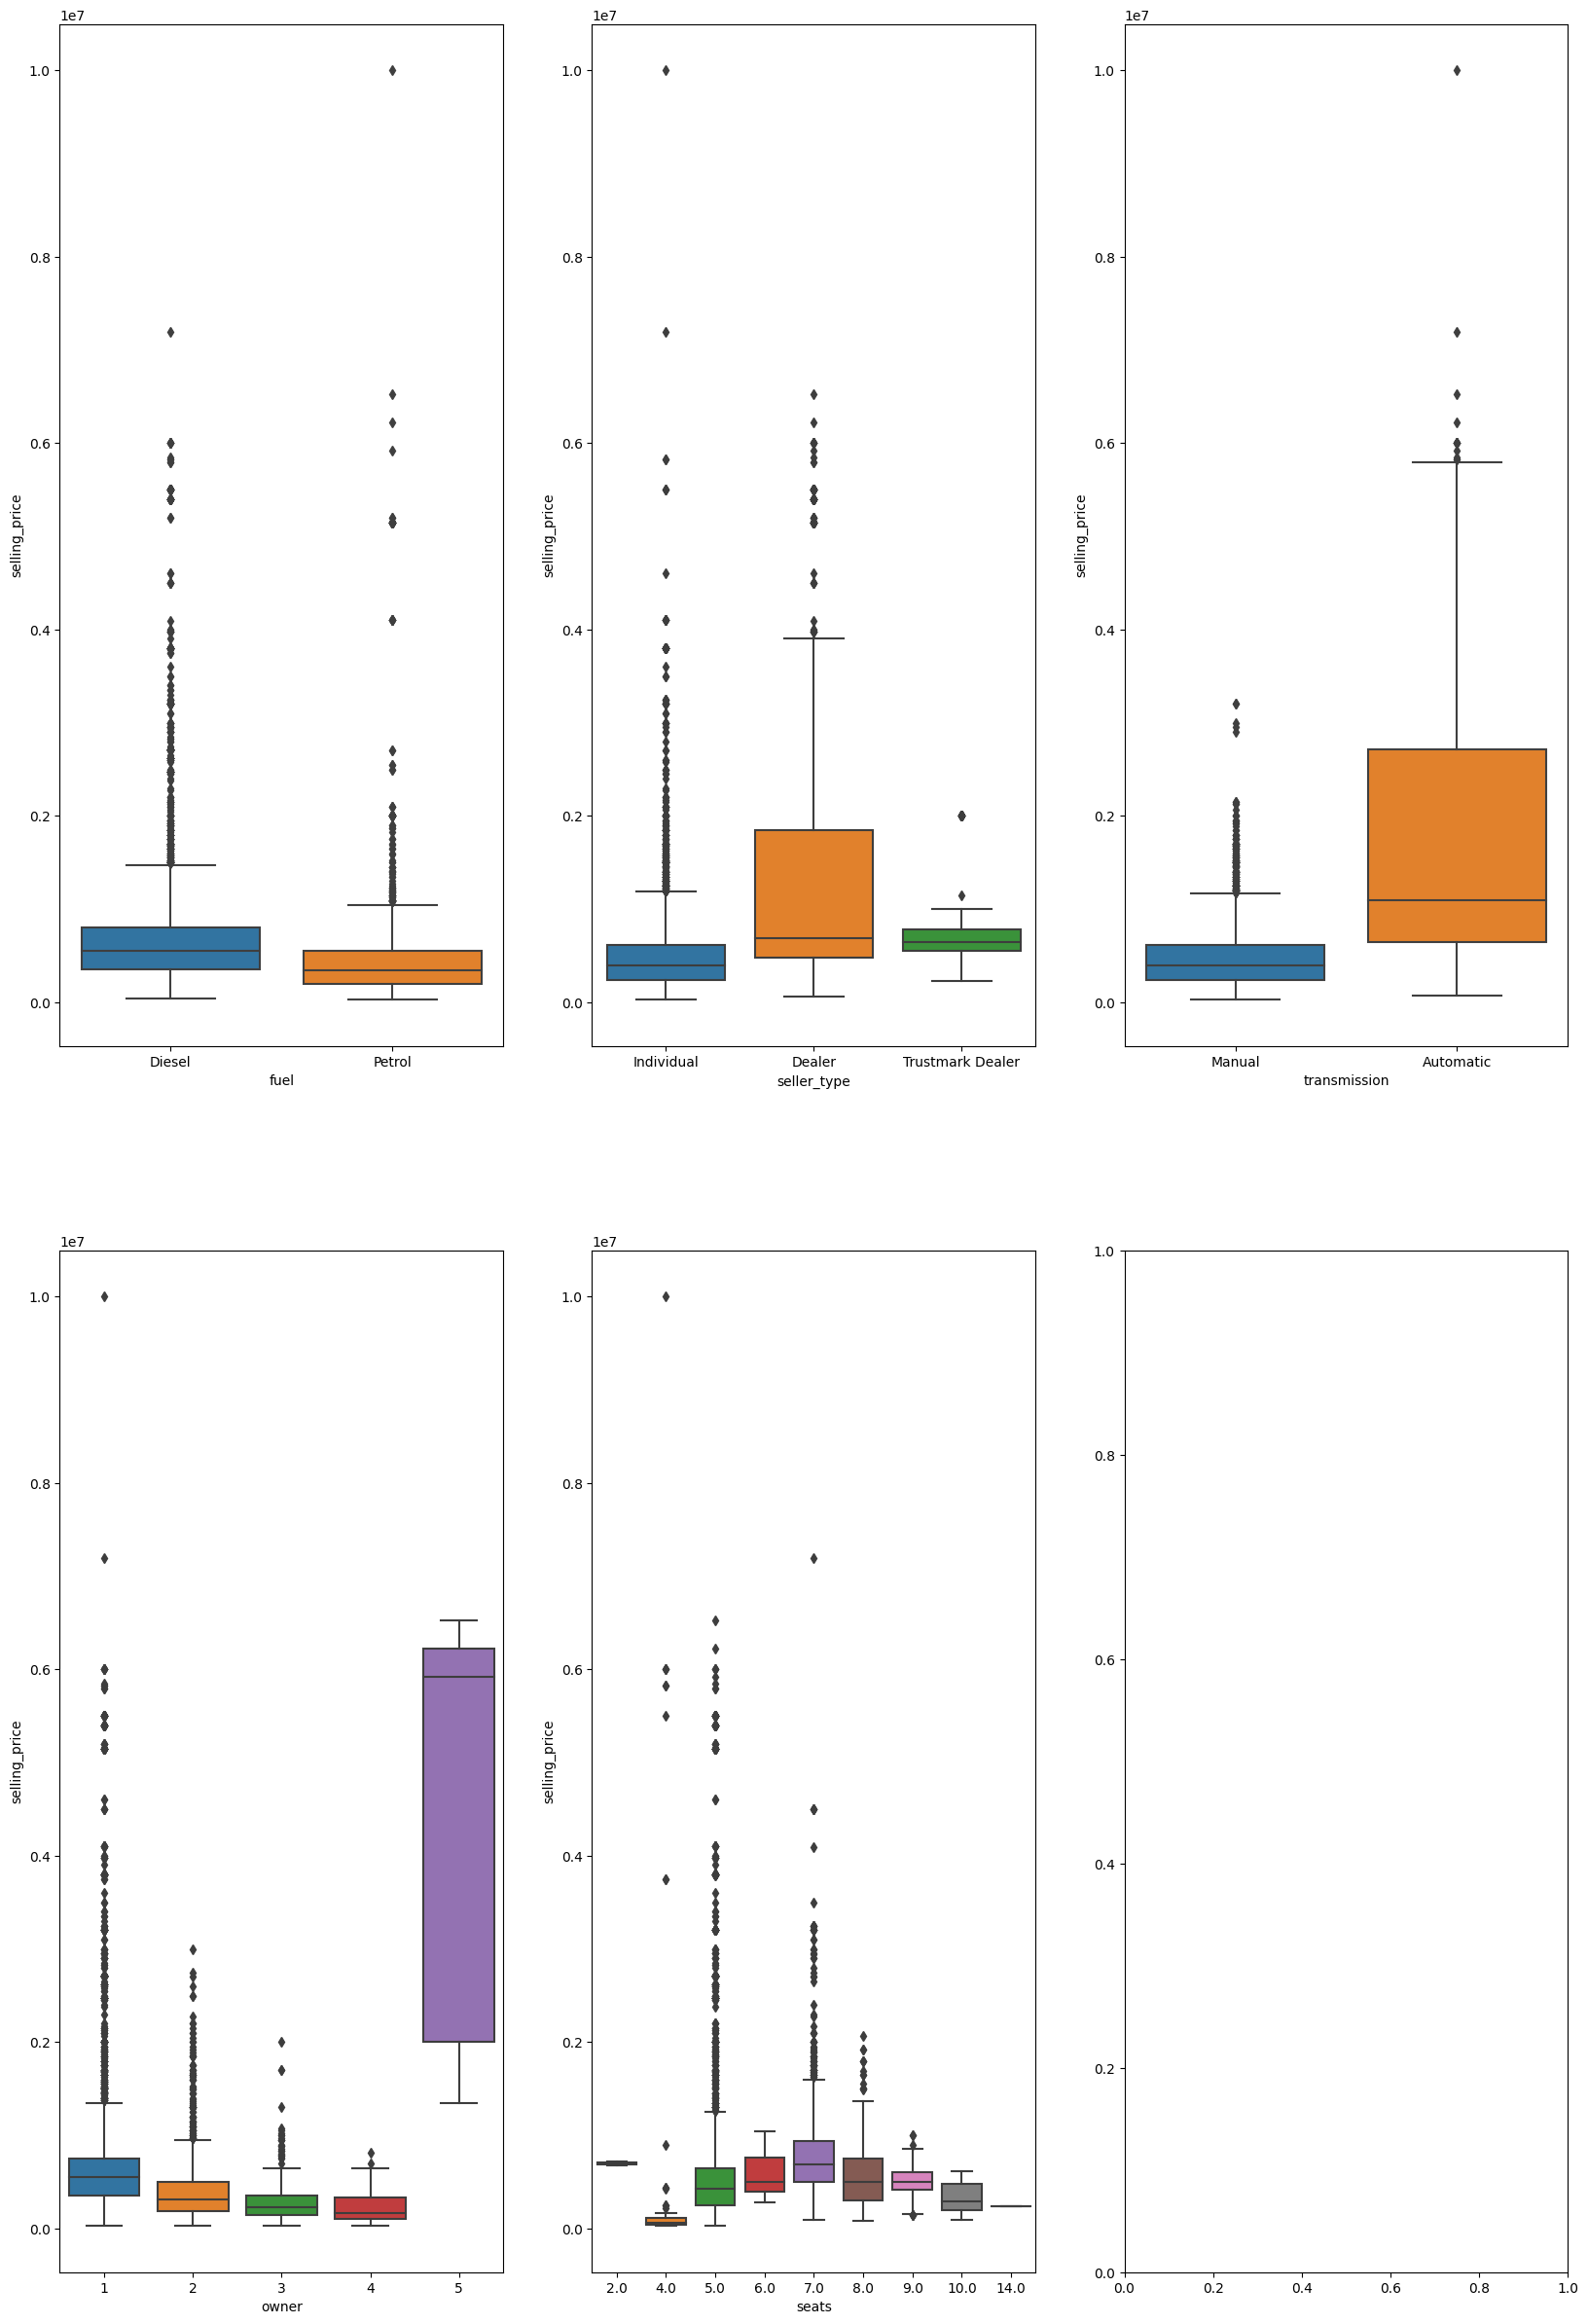

In [22]:
# Create boxplot of selling price of car in each types of fuel, types of seller, types of transmission,  types of owner car and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (20,30))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner", "seats"]):
    sns.boxplot(data = df_copy, x = col, y = "selling_price", ax = ax[i//3,i%3])

According to box_plot, it is apparent that the distribution of selling car price of test driver(number 5) differs from the others (selling car price of test driver is pretty expansive). Therefore, eliminate feature of owner that contains test driver.

<Axes: xlabel='owner', ylabel='selling_price'>

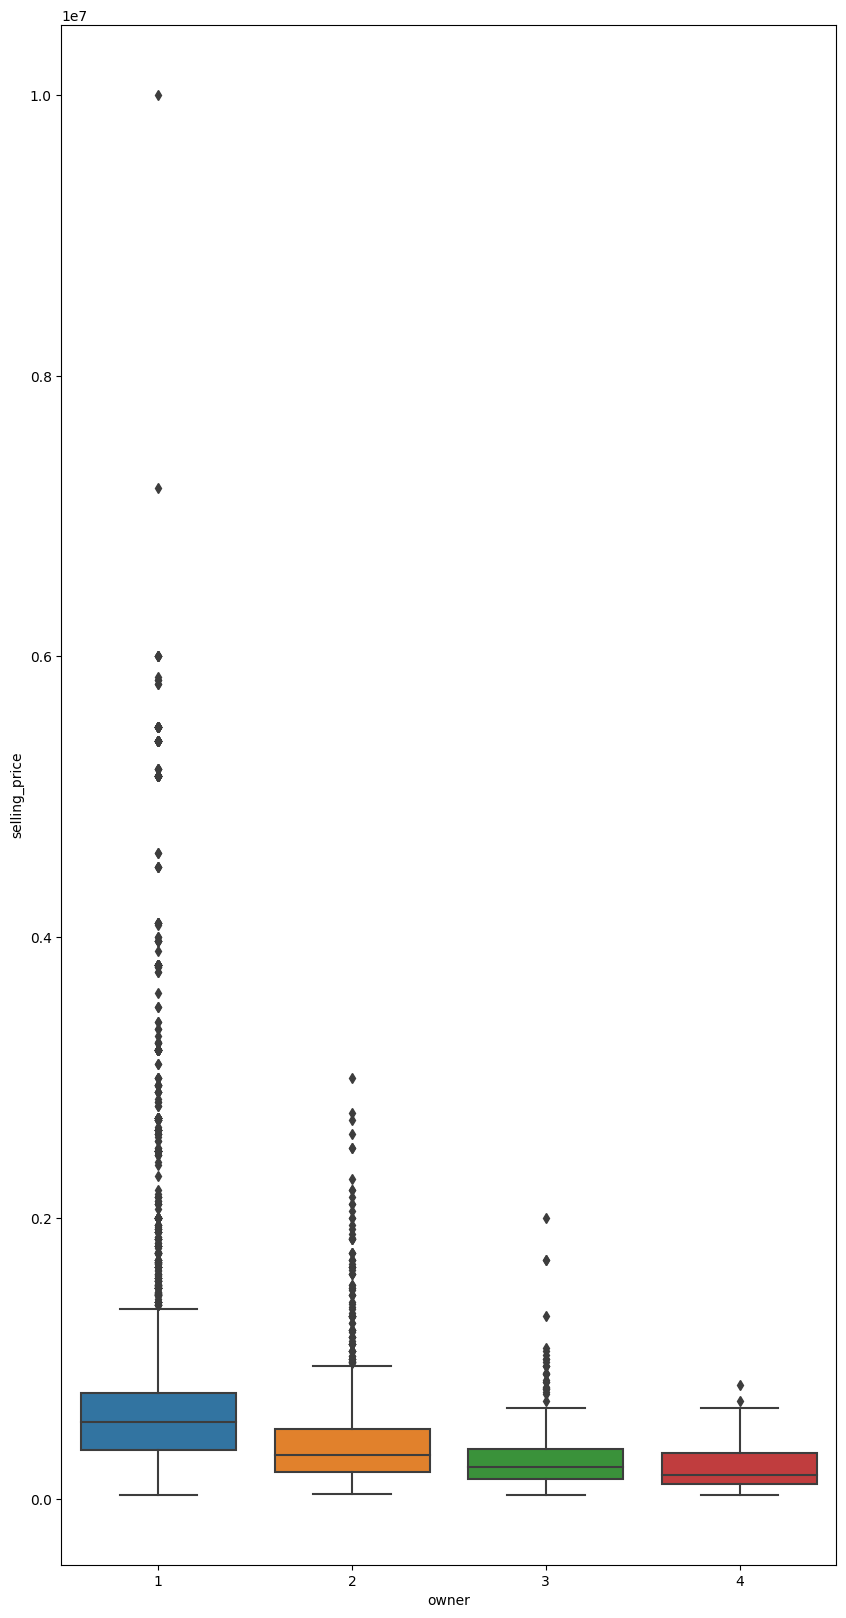

In [23]:
df_copy = df_copy[df_copy["owner"] != 5]
plt.figure(figsize = (10,20))
sns.boxplot(data = df_copy, x = "owner", y = "selling_price")

<Axes: xlabel='selling_price', ylabel='brand'>

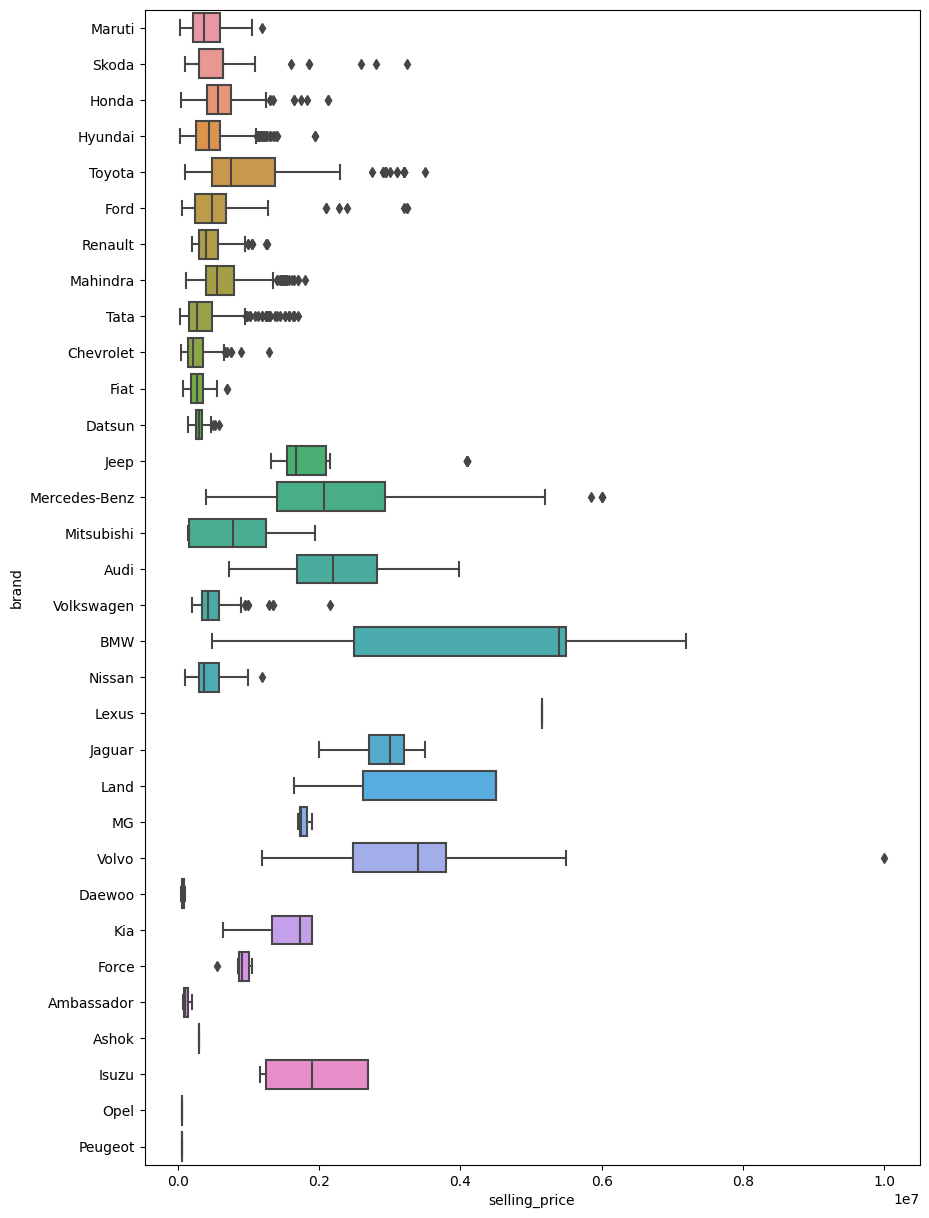

In [24]:
# Create boxplot of selling price of car in each brand name

plt.figure(figsize = (10,15))
sns.boxplot(data = df_copy, y = "brand", x = "selling_price")

Considering selling car price in each type of brand name by box-plot is pretty scattered. Therefore, brand name should not be used for car price prediction

In [25]:
# Convert features of fuel, seller_type and transmission into number by label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy["fuel"] = le.fit_transform(df_copy["fuel"])
df_copy["seller_type"] = le.fit_transform(df_copy["seller_type"])
df_copy["transmission"] = le.fit_transform(df_copy["transmission"])
df_copy.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0


<Axes: >

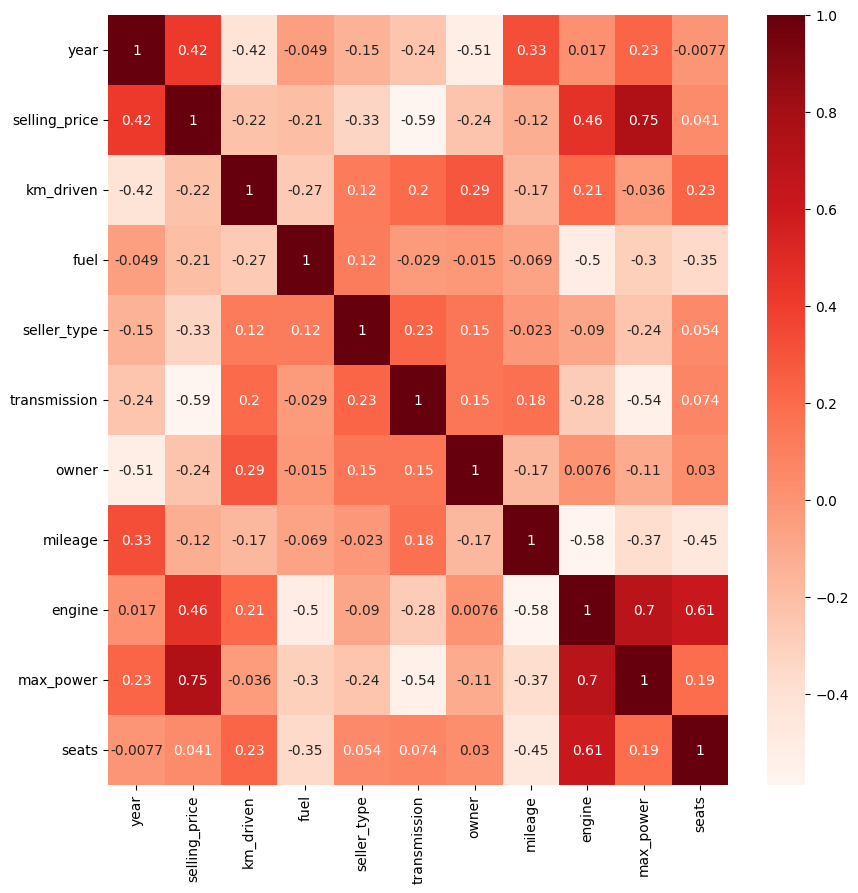

In [26]:
# Create heatmap

plt.figure(figsize = (10,10))
df_copy = df_copy.select_dtypes(exclude=[object])
sns.heatmap(df_copy.corr(), annot = True, cmap = "Reds")

<Axes: xlabel='x', ylabel='y'>

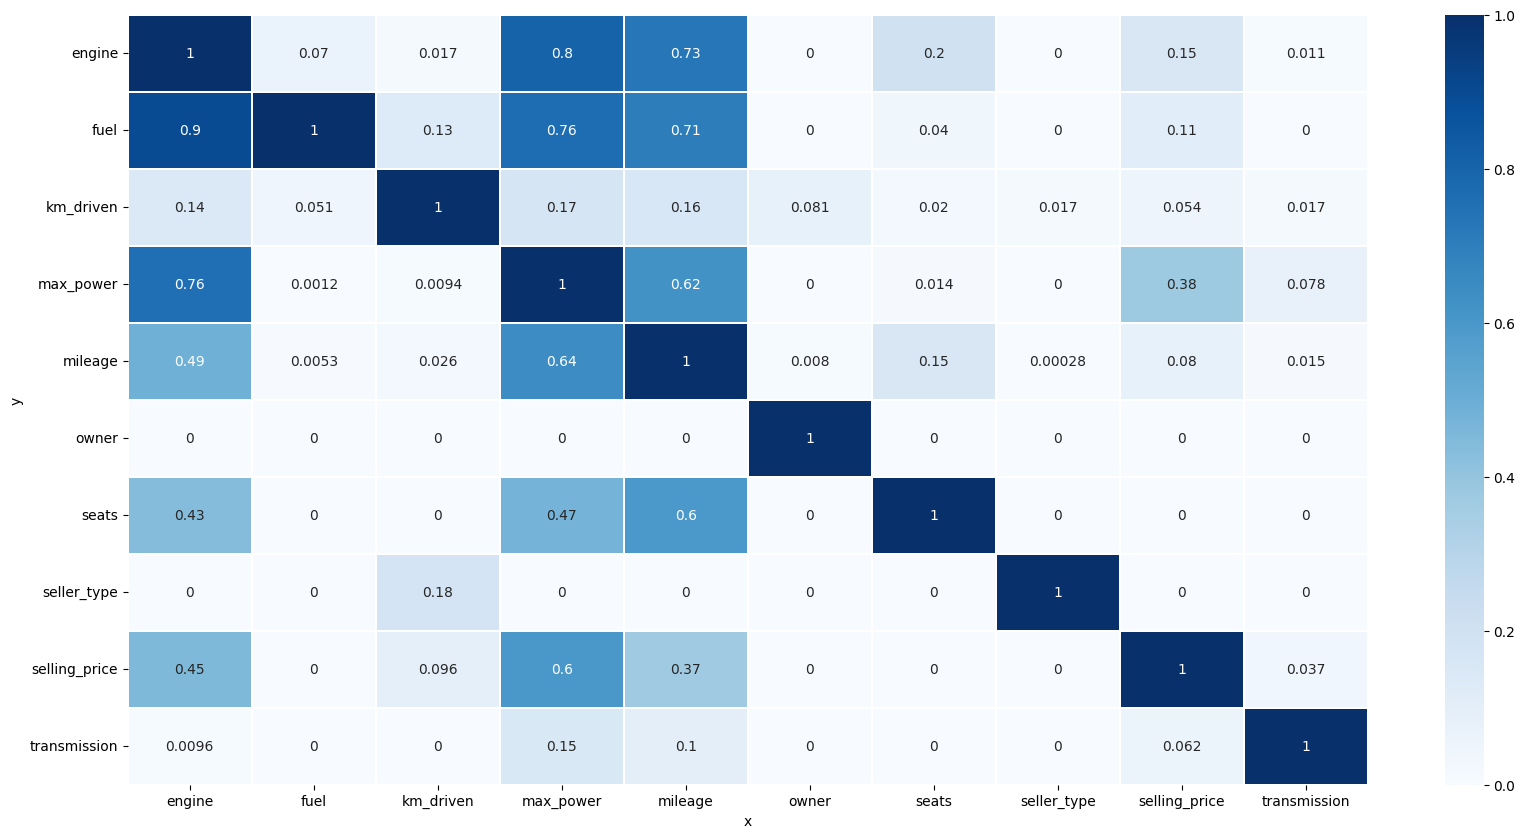

In [27]:
# Check actual prediction by predictive power score
import ppscore as pps

# drop brand and year
dfcopy = df_copy.copy()
dfcopy.drop([ 'year'], axis= 1, inplace=True)
#dfcopy.drop([ 'brand'], inplace=True, axis= 1)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

3 Feature Engineering

Since km_driven has very high number, and distribution of km_driven is right-skewed, convert this feature into log number

In [28]:
df_copy["log_km_driven"] = np.log(df_copy["km_driven"])
df_copy.head(15)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,log_km_driven
0,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,11.887931
1,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,11.695247
2,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,11.849398
3,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11.751942
4,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,11.695247
5,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0,10.714418
7,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0,8.517193
8,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0,11.407565
9,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0,12.037654
10,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0,11.127263


<Axes: >

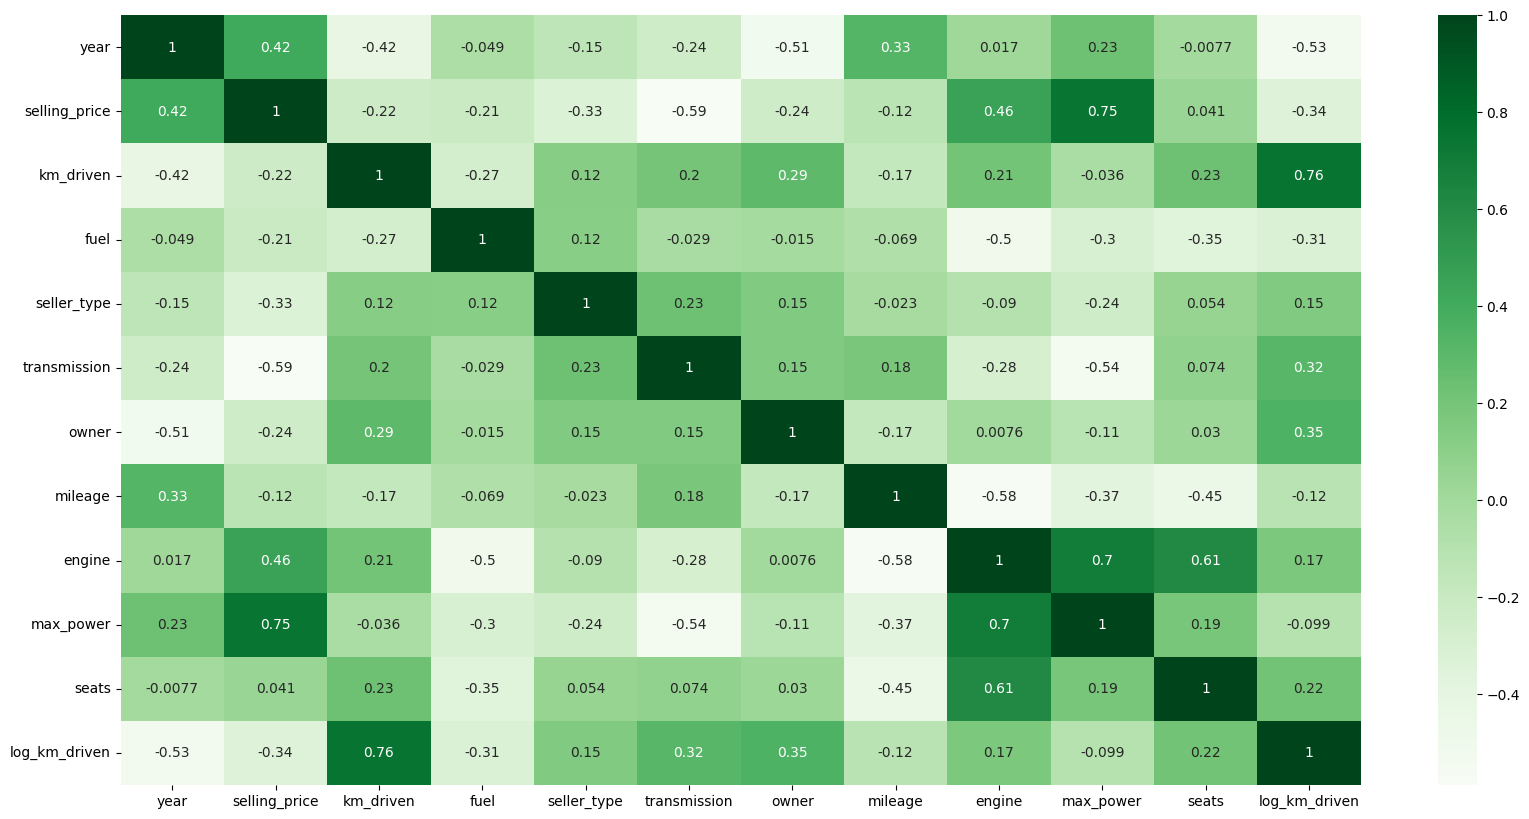

In [29]:
# Create heatmap again
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(), annot = True, cmap = "Greens")

<Axes: xlabel='x', ylabel='y'>

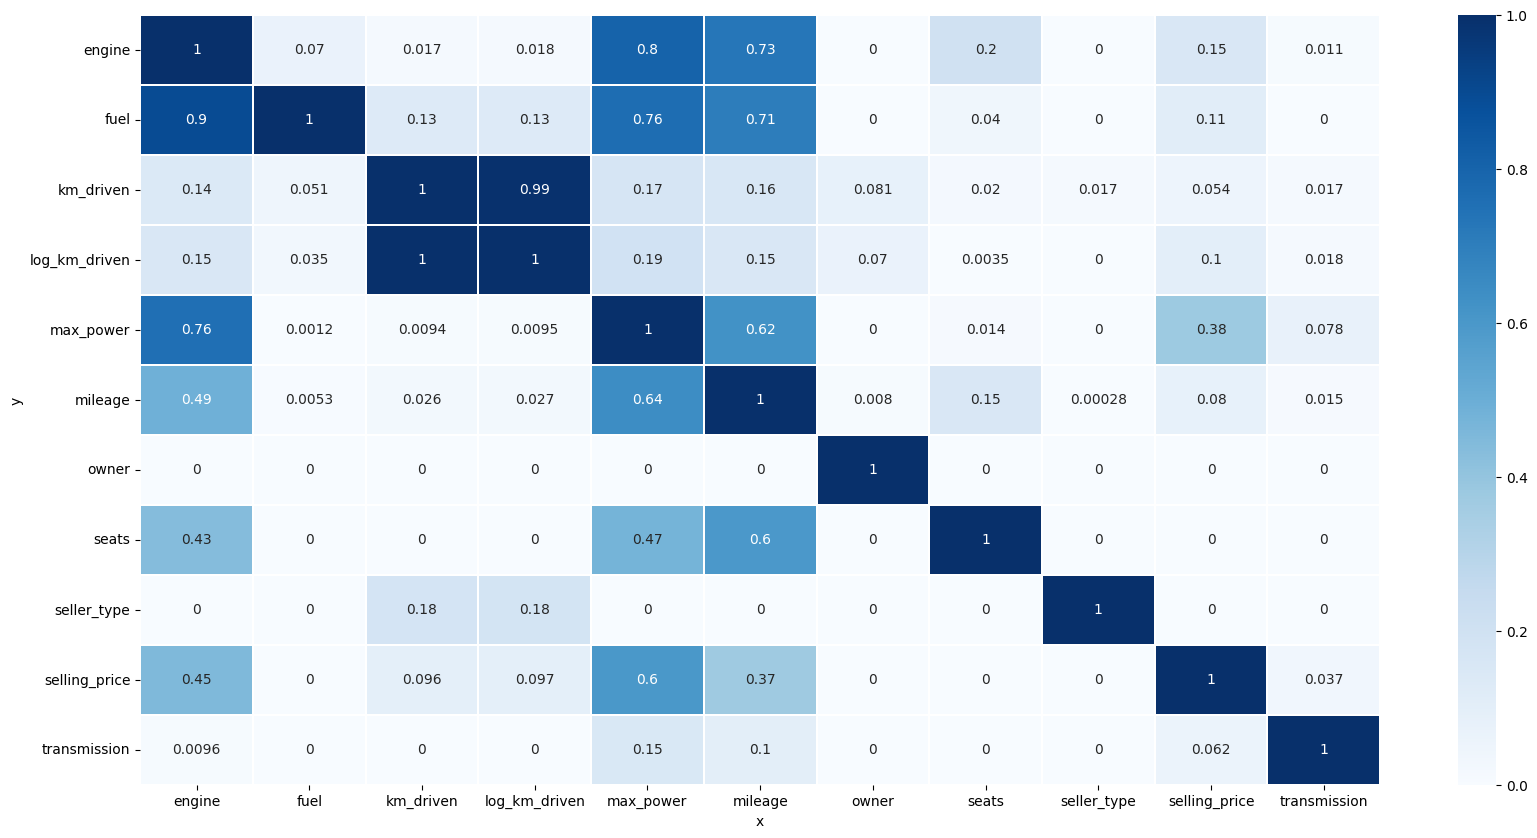

In [30]:
# Create actual prediction in heatmap again

dfcopy = df_copy.copy()
dfcopy.drop(['year'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.25, annot=True)

4 Feature Selection

According to heatmap and pps, the figures used for prediction are max_power, mileage and log_km_driven (engine could not be used since it definitely correlate with max_power)

In [31]:
X = df_copy[['max_power', 'mileage', 'log_km_driven']]

Since selling price has high number which makes prediction unstable. Thus, convert target by log transform.

In [32]:
y = np.log(df_copy['selling_price'])

In [33]:
# Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 30)

5  Preprocessing

Null Values

In [34]:
X_train.isnull().sum()

max_power        177
mileage          183
log_km_driven      0
dtype: int64

In [35]:
X_test.isnull().sum()

max_power        31
mileage          31
log_km_driven     0
dtype: int64

In [36]:
y_train.isnull().sum()

0

In [37]:
y_test.isnull().sum()

0

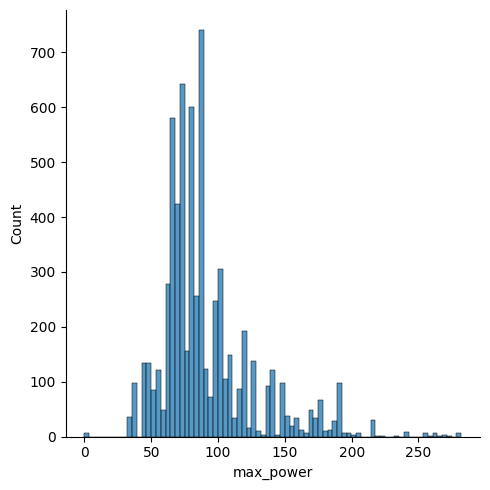

In [38]:
# Check distribution of max_power
sns.displot(data=X_train, x = 'max_power')
plt.tight_layout()

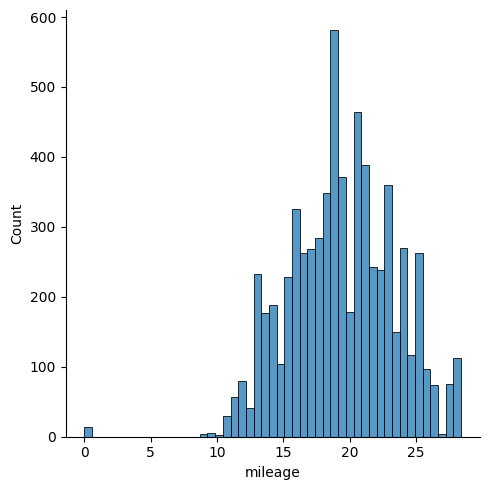

In [39]:
#Check distribution of mileage
sns.displot(data=X_train, x = 'mileage')
plt.tight_layout()

From two graphs, it can be seen that the distribution of mileage look like normal distribution while that of max_power does not. So, means is used for best configuration for mileage, while median is best to infill in max_power

In [40]:
# Fill training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [41]:
# Fill testing set
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [42]:
# Check X training dataset and testing dataset again
X_train.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

In [43]:
X_test.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

*Checking* Outlier

<Axes: xlabel='mileage'>

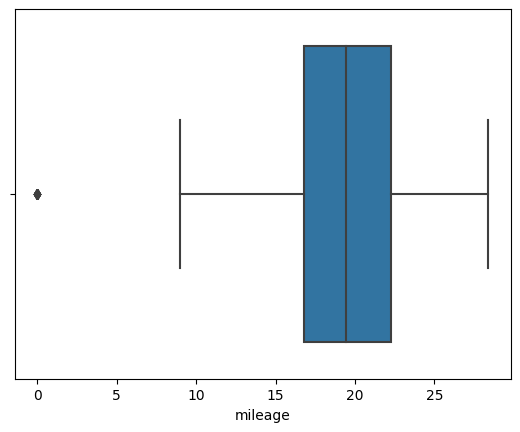

In [44]:
sns.boxplot(data = X_train, x = "mileage")

In [45]:
# Check which row in train_set has mileage lower than 5
X_train[X_train["mileage"]<5]

,max_power,mileage,log_km_driven
6629,70.00,0.0,11.289782
2725,62.10,0.0,9.615805
7337,194.00,0.0,11.002100
7002,62.10,0.0,11.289782
2137,115.00,0.0,11.078876
4527,165.00,0.0,11.608236
1649,62.00,0.0,11.759786
5846,103.25,0.0,10.243525
6824,62.00,0.0,10.596635
785,62.00,0.0,11.407565


<Axes: xlabel='max_power'>

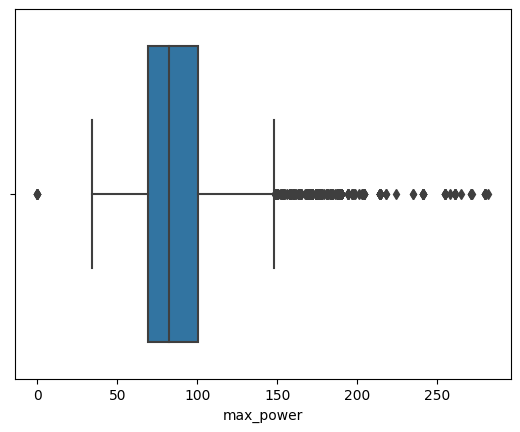

In [46]:
sns.boxplot(data = X_train, x = "max_power")

In [47]:
# Check which row in train_set has max_power lower than 5
X_train[X_train["max_power"]<5]

,max_power,mileage,log_km_driven
2550,0.0,19.416699,11.156251
2549,0.0,19.416699,11.156251
1442,0.0,19.416699,10.626970
1443,0.0,19.416699,10.626970
576,0.0,19.416699,11.487608
575,0.0,19.416699,11.487608


<Axes: xlabel='log_km_driven'>

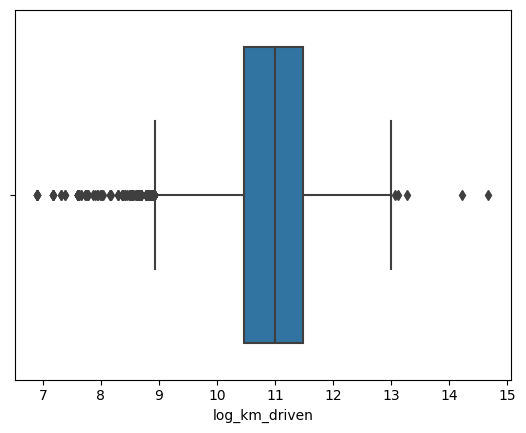

In [48]:
sns.boxplot(data = X_train, x = "log_km_driven")

In [68]:
# Check shape of features and target
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6502, 12)
Shape of X_test:  (1626, 12)
Shape of y_train:  (6502,)
Shape of y_test:  (1626,)


6 Model Selection

In [57]:
import mlflow
import numpy as np 
import os
from sklearn.model_selection import KFold


In [100]:
#experiment tracking
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "Jannatun"
# mlflow.create_experiment(name="price-prediction-car")  #create if you haven't create
mlflow.set_experiment(experiment_name="price-prediction-car")


2023/09/17 17:04:56 INFO mlflow.tracking.fluent: Experiment with name 'price-prediction-car' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/670936050616837583', creation_time=1694970296189, experiment_id='670936050616837583', last_update_time=1694970296189, lifecycle_stage='active', name='price-prediction-car', tags={}>

In [96]:

import numpy as np
import matplotlib.pyplot as plt

class CustomLinearRegression:
    def __init__(self, fit_intercept=True, initialize_weights='zeros', learning_rate=0.01, momentum=None):
        self.fit_intercept = fit_intercept
        self.initialize_weights = initialize_weights
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.weights = None
        self.history = {'loss': []}
        
    def xavier_initialization(self, n_features):
        # Xavier initialization for weights
        lower = -(1.0 / np.sqrt(n_features))
        upper = (1.0 / np.sqrt(n_features))
        return np.random.uniform(lower, upper, size=(n_features,))

    def fit(self, X_train, y_train, epochs=100):
        n_samples, n_features = X.shape

        # Initialize weights based on the chosen method
        if self.initialize_weights == 'xavier':
            self.weights = self.xavier_initialization(n_features)
        else:
            self.weights = np.zeros(n_features)

        # Initialize momentum if specified
        if self.momentum is not None:
            prev_step = np.zeros(n_features)

        for _ in range(epochs):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            gradient = np.dot(X.T, error) / n_samples

            if self.momentum is not None:
                step = self.learning_rate * gradient + self.momentum * prev_step
                prev_step = step
            else:
                step = self.learning_rate * gradient

            self.weights -= step
            mse = np.mean((y_pred - y) ** 2)
            self.history['loss'].append(mse)
            print(f"Epoch {epochs}/{epochs}, MSE: {mse}")


    def predict(self, X):
        return np.dot(X, self.weights)

    def r2(self, y_true, y_pred):
        ssr = np.sum((y_true - y_pred) ** 2)
        sst = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ssr / sst)
        return r2

    def plot_feature_importance(self, feature_names):
        # Plot feature importance based on coefficients
        plt.figure(figsize=(10, 6))
        importance = np.abs(self.weights)
        sorted_idx = np.argsort(importance)[::-1]
        feature_names = np.array(feature_names)
        plt.bar(feature_names[sorted_idx], importance[sorted_idx])
        plt.title("Feature Importance")
        plt.xlabel("Features")
        plt.ylabel("Absolute Coefficient Value")
        plt.xticks(rotation=90)
        plt.show()

    


In [97]:
custom_lr = CustomLinearRegression(
    fit_intercept=True,               # Whether to fit an intercept (bias term)
    initialize_weights='xavier',      # Weight initialization method ('zeros' or 'xavier')
    learning_rate=0.01,               # Learning rate for gradient descent
    momentum=0.9                      # Momentum coefficient (optional)
)





In [98]:
import mlflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize MLflow tracking
mlflow.start_run()

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define regression types
regression_types = ["polynomial", "lasso", "ridge", "normal"]

# Initialize dictionaries to store results
mse_results = {}
r2_results = {}

# Perform cross-validation for each regression type
for regression_type in regression_types:
    mse_scores = []
    r2_scores = []
    
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_val[val_index]

        model = CustomLinearRegression(
            regression_type=regression_type,
            momentum=None,  # You can add momentum if needed
            optimizer="batch",  # Choose your optimization method
            weight_init="xavier",  # Choose your weight initialization
            learning_rate=0.01  # Choose your learning rate
        )

        model.fit(X_train_fold, y_train_fold, epochs=100)  # Adjust the number of epochs as needed
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Log metrics using MLflow
        with mlflow.start_run(nested=True):
            mlflow.log_param("Regression Type", regression_type)
            mlflow.log_param("Fold", fold)
            mlflow.log_metric("MSE", mse)
            mlflow.log_metric("R2", r2)

    mse_results[regression_type] = mse_scores
    r2_results[regression_type] = r2_scores

# Stop the MLflow run
mlflow.end_run()



KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    9,   10,\n            ...\n            6488, 6489, 6490, 6491, 6492, 6495, 6496, 6497, 6500, 6501],\n           dtype='int64', length=5201)] are in the [columns]"

In [99]:
from sklearn.linear_model import SGDRegressor

import mlflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Initialize MLflow tracking
mlflow.start_run()

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define whether to use momentum or not
momentum_values = [None, 0.9]  # You can adjust the momentum values

# Initialize dictionaries to store results
mse_results = {}
r2_results = {}

# Perform cross-validation for each momentum configuration
for momentum in momentum_values:
    mse_scores = []
    r2_scores = []
    
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_val[val_index]

        if momentum is None:
            model = CustomLinearRegression(
                regression_type="normal",
                momentum=None,
                optimizer="batch",
                weight_init="xavier",
                learning_rate=0.01
            )
        else:
            model = SGDRegressor(
                loss='squared_loss',
                learning_rate='constant',
                eta0=0.01,
                max_iter=100,  # Adjust the number of iterations as needed
                momentum=momentum,
                random_state=42
            )

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Log metrics using MLflow
        with mlflow.start_run(nested=True):
            mlflow.log_param("Momentum", momentum)
            mlflow.log_param("Fold", fold)
            mlflow.log_metric("MSE", mse)
            mlflow.log_metric("R2", r2)

    if momentum is None:
        mse_results["Without Momentum"] = mse_scores
        r2_results["Without Momentum"] = r2_scores
    else:
        mse_results[f"With Momentum ({momentum})"] = mse_scores
        r2_results[f"With Momentum ({momentum})"] = r2_scores

# Stop the MLflow run
mlflow.end_run()



Exception: Run with UUID 2ad010dc62f44d03a95576491c22c068 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [ ]:
from sklearn.linear_model import SGDRegressor

import mlflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize MLflow tracking
mlflow.start_run()

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define optimization methods and weight initialization methods
optimization_methods = ["stochastic", "mini-batch", "batch"]
weight_init_methods = ["zero", "xavier"]

# Initialize dictionaries to store results
mse_results = {}
r2_results = {}

# Perform cross-validation for each optimization method and weight initialization method
for opt_method in optimization_methods:
    for weight_init in weight_init_methods:
        mse_scores = []
        r2_scores = []

        for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_val[val_index]

            if opt_method == "stochastic":
                model = CustomLinearRegression(
                    regression_type="normal",
                    momentum=None,
                    optimizer="stochastic",
                    weight_init=weight_init,
                    learning_rate=0.01
                )
            elif opt_method == "mini-batch":
                model = CustomLinearRegression(
                    regression_type="normal",
                    momentum=None,
                    optimizer="mini-batch",
                    weight_init=weight_init,
                    learning_rate=0.01
                )
            else:
                model = CustomLinearRegression(
                    regression_type="normal",
                    momentum=None,
                    optimizer="batch",
                    weight_init=weight_init,
                    learning_rate=0.01
                )

            model.fit(X_train_fold, y_train_fold)
            y_val_pred = model.predict(X_val_fold)

            mse = mean_squared_error(y_val_fold, y_val_pred)
            r2 = r2_score(y_val_fold, y_val_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)

            # Log metrics using MLflow
            with mlflow.start_run(nested=True):
                mlflow.log_param("Optimization Method", opt_method)
                mlflow.log_param("Weight Initialization", weight_init)
                mlflow.log_param("Fold", fold)
                mlflow.log_metric("MSE", mse)
                mlflow.log_metric("R2", r2)

        mse_results[f"{opt_method.capitalize()}, {weight_init.capitalize()}"] = mse_scores
        r2_results[f"{opt_method.capitalize()}, {weight_init.capitalize()}"] = r2_scores

# Stop the MLflow run
mlflow.end_run()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import mlflow

# Initialize MLflow tracking
mlflow.start_run()

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define weight initialization methods
weight_init_methods = ["zero", "xavier"]

# Initialize dictionaries to store results
mse_results = {}
r2_results = {}

# Perform cross-validation for each weight initialization method
for weight_init in weight_init_methods:
    mse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_val[val_index]

        if weight_init == "zero":
            model = CustomLinearRegression(
                regression_type="normal",
                momentum=None,
                optimizer="batch",
                weight_init="zeros",
                learning_rate=0.01
            )
        elif weight_init == "xavier":
            model = CustomLinearRegression(
                regression_type="normal",
                momentum=None,
                optimizer="batch",
                weight_init="xavier",
                learning_rate=0.01
            )

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Log metrics using MLflow
        with mlflow.start_run(nested=True):
            mlflow.log_param("Weight Initialization", weight_init)
            mlflow.log_param("Fold", fold)
            mlflow.log_metric("MSE", mse)
            mlflow.log_metric("R2", r2)

    mse_results[weight_init.capitalize()] = mse_scores
    r2_results[weight_init.capitalize()] = r2_scores

# Stop the MLflow run
mlflow.end_run()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import mlflow

# Initialize MLflow tracking
mlflow.start_run()

# Define the number of folds for k-fold cross-validation
num_folds = 5

# Create a KFold object for cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define learning rates to compare
learning_rates = [0.01, 0.001, 0.0001]

# Initialize dictionaries to store results
mse_results = {}
r2_results = {}

# Perform cross-validation for each learning rate
for learning_rate in learning_rates:
    mse_scores = []
    r2_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_val[val_index]

        model = CustomLinearRegression(
            regression_type="normal",
            momentum=None,
            optimizer="batch",
            weight_init="xavier",
            learning_rate=learning_rate
        )

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)

        # Log metrics using MLflow
        with mlflow.start_run(nested=True):
            mlflow.log_param("Learning Rate", learning_rate)
            mlflow.log_param("Fold", fold)
            mlflow.log_metric("MSE", mse)
            mlflow.log_metric("R2", r2)

    mse_results[f"LR_{learning_rate}"] = mse_scores
    r2_results[f"LR_{learning_rate}"] = r2_scores

# Stop the MLflow run
mlflow.end_run()


In [61]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Define a function to create and log MLflow runs
def run_experiment(model, params, X_train, y_train, X_test, y_test):
    with mlflow.start_run():
        mlflow.log_params(params)

        # Create and fit the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate and log metrics
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        mlflow.log_metrics({"r2": r2, "mse": mse})

# Define a list of scenarios to test
scenarios = [
    {
        "model": LinearRegression(),
        "params": {"model_type": "LinearRegression"},
    },
    {
        "model": Lasso(),
        "params": {"model_type": "Lasso"},
    },
    {
        "model": Ridge(),
        "params": {"model_type": "Ridge"},
    },
    {
        "model": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
        "params": {"model_type": "PolynomialRegression", "degree": 2},
    },
    # Add more scenarios here as needed
]

# Loop through scenarios
for scenario in scenarios:
    model = scenario["model"]
    params = scenario["params"]

    # Create and log an MLflow run for each scenario
    run_experiment(model, params, X_train, y_train, X_test, y_test)

# You can repeat this code with different scenarios, learning rates, etc.

# Repeat the above code with different parameter settings for your experiments.


In [51]:
# Prepare type of regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

algorithms = [LinearRegression(), Ridge(), Lasso(), SVR(),
              KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 200, random_state = 0),
              XGBRegressor(n_estimators = 200, random_state = 0)]

algorithm_names = ["Linear Regression", "Ridge", "Lasso", "SVR", "KNeighbors Regressor",
                   "Decision-Tree Regressor", "Random-Forest Regressor","XGBRegressor"]


In [52]:
# defining splits of kfold for cross-validation
kfold = KFold(n_splits=8, shuffle=True)

# iterate for finding mse and mean mse for each model
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.23089189 -0.2597701  -0.22941955 -0.22297858 -0.27260082 -0.26834025
 -0.23691031 -0.25681589]; Mean: -0.24721592245526466
Ridge - Score: [-0.25848848 -0.27079464 -0.24381731 -0.23674816 -0.2439808  -0.24313538
 -0.24179298 -0.23968614]; Mean: -0.24730548767486776
Lasso - Score: [-0.32692855 -0.35471654 -0.37510391 -0.34778582 -0.33450732 -0.34113005
 -0.32754683 -0.32635585]; Mean: -0.34175936022805226
SVR - Score: [-0.22356989 -0.21871307 -0.23084233 -0.24090374 -0.2238196  -0.25860164
 -0.2529615  -0.26252034]; Mean: -0.23899151483899905
KNeighbors Regressor - Score: [-0.10378419 -0.11096051 -0.11228632 -0.11704416 -0.11049697 -0.11932888
 -0.10821355 -0.1230107 ]; Mean: -0.11314065997272386
Decision-Tree Regressor - Score: [-0.12136511 -0.11371043 -0.12769995 -0.12757688 -0.14056379 -0.15562973
 -0.11603173 -0.11746911]; Mean: -0.12750584170698878
Random-Forest Regressor - Score: [-0.08824114 -0.1018944  -0.0922475  -0.08607308 -0.10261071 -0.10315081

##According to result, XGBRegressor has more accuracy than the other model in terms of mse. So, this regressor is selected for finding best configuration.

GridsearchCV

Iterating to find the best parameters in XGBRegressor
for car prediction

max_depth : [5, 10, 15]

learning_rate : [0.01, 0.02, 0.05, 0.10]

n_estimators : [200, 300, 400, 500, 600]

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf,
                    param_grid = param_grid,
                    cv = kfold,
                    n_jobs = -1,
                    return_train_score=True,
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);

In [54]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 300}

In [55]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse

-0.08551513353360465

7 Testing

In [56]:
# Test model
pred_y = grid.predict(X_test)
print("MSE of this model is:",mean_squared_error(np.exp(y_test), np.exp(pred_y)))# find mse
print("R-squared of this model is:", r2_score(np.exp(y_test), np.exp(pred_y))) # find r2

MSE of this model is: 59325745078.83099
R-squared of this model is: 0.9095519099349674


Analysis: Feature Importance

In [57]:
# Find feature importance after applying XGBRegressor model
rf = grid.best_estimator_
rf.feature_importances_

array([0.76133364, 0.16244763, 0.07621872], dtype=float32)

Text(0.5, 0, 'Random Forest Feature Importance')

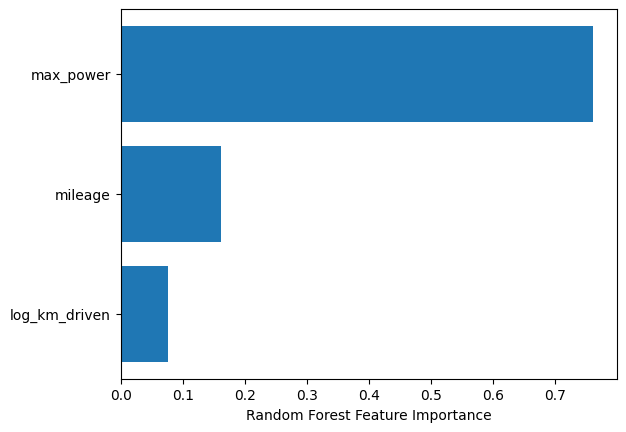

In [58]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

9. Inference

In [59]:
import pickle

# save the model
filename = 'car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [60]:
# load the model for testing
loaded_model = pickle.load(open(filename, 'rb'))

In [61]:
df_copy[["max_power","mileage","log_km_driven","selling_price"]].loc[25]

max_power            83.100000
mileage              21.400000
log_km_driven        10.714418
selling_price    575000.000000
Name: 25, dtype: float64

In [62]:
# Check if model could be applied.
sample = np.array([[83.1, 21.4, 10.714418]])
predicted_life_exp = loaded_model.predict(sample)
np.exp(predicted_life_exp)

array([571813.4], dtype=float32)

XGBRegressor outperforms other models in prediction due to its proficiency in handling large datasets and capturing both linear and non-linear relationships. In stark contrast, linear models like Lasso, SVM, or linear regression tend to yield high average mean squared errors, highlighting their limitations compared to XGBRegressor. This underscores the challenge of maintaining linear correlations between features and the target variable.

The impressive R-square score of approximately 0.9 achieved with XGBRegression indicates its substantial predictive capabilities. Nevertheless, the presence of large target values contributes to the relatively high mean squared error, leading to less precise forecasts of selling prices.

Assessments based on predictive power ratings and correlation heatmaps reveal that "max power," a crucial attribute, exhibits a strong correlation with selling price. Mileage and log_km_driven, while still influential, hold less significance in comparison. Interestingly, despite its prominent appearance in the heatmap, "transmission" demonstrates a weak actual connection with selling price, as evidenced by predictive power scores.
XGBRegressor excels in prediction tasks due to its adeptness at handling substantial data volumes and capturing both linear and non-linear relationships. Conversely, linear models such as Lasso, SVM, or linear regression tend to yield high average mean squared errors, exposing their limitations when compared to XGBRegressor. This highlights the challenge of maintaining linear relationships between features and the target variable.

Achieving an R-square score of approximately 0.9 with XGBRegression underscores its remarkable predictive capabilities. However, the presence of significantly large target values contributes to the relatively high mean squared error, resulting in less precise forecasts of selling prices.

Evaluations based on predictive power ratings and correlation heatmaps reveal that "max power," a critical feature, exhibits a strong correlation with selling price. In contrast, mileage and log_km_driven, while still relevant, carry less weight. Intriguingly, despite its apparent prominence in the heatmap, "transmission" demonstrates a weak actual association with selling price, as indicated by predictive power scores.